# KAVETI ANJALI _RA2011026010189

# Importing all required libraries

In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, SelectFromModel, chi2
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [357]:
import warnings

In [358]:
warnings.filterwarnings(action='ignore')

# Reading the given excel file

In [359]:
file = pd.ExcelFile('Assignment- Membership woes.xlsx')
file.sheet_names  # see all sheet names

['Data', 'Problem statement']

In [360]:
prob_statement= pd.read_excel("Assignment- Membership woes.xlsx", sheet_name='Problem statement')
prob_statement.head()

,Problem Statement,Unnamed: 1
0,A certain premium club boasts a large customer...,NaN
1,for using the exclusive facilities offered by ...,NaN
2,"In the last few years, however, the club has b...",NaN
3,The club management plans to address this issu...,NaN
4,enough bandwidth to reach out to the entire cu...,NaN


# Exploratory Data Analysis (EDA) & Data Pre-processing:

In [361]:
data = pd.read_excel("Assignment- Membership woes.xlsx", sheet_name='Data')
data.head()

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN


In [362]:
data.columns

Index(['MEMBERSHIP_NUMBER', 'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES',
       'MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBER_ANNUAL_INCOME',
       'MEMBER_OCCUPATION_CD', 'MEMBERSHIP_PACKAGE', 'MEMBER_AGE_AT_ISSUE',
       'ADDITIONAL_MEMBERS', 'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS',
       'START_DATE (YYYYMMDD)', 'END_DATE  (YYYYMMDD)'],
      dtype='object')

In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      10362 non-null  object 
 1   MEMBERSHIP_TERM_YEARS  10362 non-null  int64  
 2   ANNUAL_FEES            10362 non-null  float64
 3   MEMBER_MARITAL_STATUS  7765 non-null   object 
 4   MEMBER_GENDER          9751 non-null   object 
 5   MEMBER_ANNUAL_INCOME   8608 non-null   float64
 6   MEMBER_OCCUPATION_CD   10319 non-null  float64
 7   MEMBERSHIP_PACKAGE     10362 non-null  object 
 8   MEMBER_AGE_AT_ISSUE    10362 non-null  int64  
 9   ADDITIONAL_MEMBERS     10362 non-null  int64  
 10  PAYMENT_MODE           10362 non-null  object 
 11  AGENT_CODE             10362 non-null  object 
 12  MEMBERSHIP_STATUS      10362 non-null  object 
 13  START_DATE (YYYYMMDD)  10362 non-null  int64  
 14  END_DATE  (YYYYMMDD)   3143 non-null   float64
dtypes:

In [364]:
data.describe()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
count,10362.000000,1.036200e+04,8.608000e+03,10319.000000,10362.000000,10362.000000,1.036200e+04,3.143000e+03
mean,29.395001,1.788122e+05,1.451100e+06,1.711019,46.798494,1.412276,2.010828e+07,2.011390e+07
std,22.427712,2.688747e+05,1.757174e+07,1.453960,13.897085,1.145136,1.719666e+04,1.378483e+04
min,9.000000,0.000000e+00,9.996000e+03,1.000000,0.000000,0.000000,2.006091e+07,2.007083e+07
25%,12.000000,1.000000e+05,3.999960e+05,1.000000,37.000000,0.000000,2.009123e+07,2.010122e+07
50%,19.000000,1.182093e+05,5.499960e+05,1.000000,46.000000,1.000000,2.010123e+07,2.011113e+07
75%,37.000000,1.900000e+05,9.999960e+05,2.000000,57.000000,2.000000,2.012123e+07,2.013012e+07
max,102.000000,1.010000e+07,1.000000e+09,6.000000,92.000000,3.000000,2.013113e+07,2.013112e+07


In [365]:
print(len(data))
print(len(data['END_DATE  (YYYYMMDD)'].unique()))
print(len(data['START_DATE (YYYYMMDD)'].unique()))
print(data['MEMBERSHIP_STATUS'].unique()) 
print() 
print(data['MEMBER_GENDER'].unique()) 
print()
print(data['PAYMENT_MODE'].unique()) 
print()
print(data[data['MEMBERSHIP_STATUS']=='INFORCE'].count())

10362
1062
1300
['INFORCE' 'CANCELLED']

['M' nan 'F']

['ANNUAL' 'QUARTERLY' 'MONTHLY' 'SEMI-ANNUAL' 'SINGLE-PREMIUM']

MEMBERSHIP_NUMBER        7219
MEMBERSHIP_TERM_YEARS    7219
ANNUAL_FEES              7219
MEMBER_MARITAL_STATUS    5310
MEMBER_GENDER            6797
MEMBER_ANNUAL_INCOME     5992
MEMBER_OCCUPATION_CD     7184
MEMBERSHIP_PACKAGE       7219
MEMBER_AGE_AT_ISSUE      7219
ADDITIONAL_MEMBERS       7219
PAYMENT_MODE             7219
AGENT_CODE               7219
MEMBERSHIP_STATUS        7219
START_DATE (YYYYMMDD)    7219
END_DATE  (YYYYMMDD)        0
dtype: int64


In [366]:
# Check the proportion of data belonging to each of the classes.
print(data['MEMBERSHIP_STATUS'].value_counts(normalize=True)) 

MEMBERSHIP_STATUS
INFORCE      0.69668
CANCELLED    0.30332
Name: proportion, dtype: float64


In [367]:
# The membership number of a particular user won't we of any use in predicting he's cancelling the subscription or not.
# And then we have already seen that their are too many null values in the END_DATE column for it to be used.

req_data = data.drop(['MEMBERSHIP_NUMBER', 'END_DATE  (YYYYMMDD)', 'AGENT_CODE'],  axis=1)
req_data.head(5)

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD)
0,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,INFORCE,20060914
1,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,INFORCE,20061102
2,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,INFORCE,20070124
3,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,INFORCE,20070122
4,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,INFORCE,20070131


In [368]:
print(data.isnull().sum())

MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2597
MEMBER_GENDER             611
MEMBER_ANNUAL_INCOME     1754
MEMBER_OCCUPATION_CD       43
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)     7219
dtype: int64


In [369]:
### Nearly ~16% of values in column 'MEMBER_ANNUAL_INCOME' are null, so decided to fill those with mean of column values

print(req_data['MEMBER_ANNUAL_INCOME'].isna().sum())
print(req_data['MEMBER_ANNUAL_INCOME'].mean())

1754
1451099.5539033457


In [370]:
req_data['MEMBER_ANNUAL_INCOME'].fillna(req_data['MEMBER_ANNUAL_INCOME'].mean(), inplace=True)


In [371]:
for i in req_data['MEMBER_OCCUPATION_CD'].unique():
    print(i)

1.0
4.0
5.0
6.0
nan
2.0
3.0


In [372]:
# The null values in the respective columns can be filled with Other/NA etc.

req_data['MEMBER_MARITAL_STATUS'].fillna(value = 'Other', inplace=True)
req_data['MEMBERSHIP_STATUS'].fillna(value = 'Other', inplace=True)
req_data['MEMBERSHIP_PACKAGE'].fillna(value = 'Other', inplace=True)
req_data['PAYMENT_MODE'].fillna(value = 'Other', inplace=True)
req_data['MEMBER_GENDER'].fillna(value = 'Other', inplace=True)
req_data['MEMBER_OCCUPATION_CD'].fillna(value = 5.0, inplace=True)

In [373]:
# From the date column, we can have the month as it may be a factor
req_data['START_DATE (YYYYMMDD)'] = pd.DatetimeIndex(req_data['START_DATE (YYYYMMDD)']).month


In [374]:
onehot_req_data = pd.get_dummies(req_data, columns=
     ['MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBERSHIP_PACKAGE', 'PAYMENT_MODE', 'MEMBERSHIP_STATUS'], drop_first=True)
onehot_req_data.head(5)

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,START_DATE (YYYYMMDD),MEMBER_MARITAL_STATUS_M,MEMBER_MARITAL_STATUS_Other,MEMBER_MARITAL_STATUS_S,MEMBER_MARITAL_STATUS_W,MEMBER_GENDER_M,MEMBER_GENDER_Other,MEMBERSHIP_PACKAGE_TYPE-B,PAYMENT_MODE_MONTHLY,PAYMENT_MODE_QUARTERLY,PAYMENT_MODE_SEMI-ANNUAL,PAYMENT_MODE_SINGLE-PREMIUM,MEMBERSHIP_STATUS_INFORCE
0,29,113125.0,25200000.0,1.0,45,2,1,True,False,False,False,True,False,True,False,False,False,False,True
1,38,112220.0,10339200.0,1.0,36,3,1,True,False,False,False,True,False,True,False,True,False,False,True
2,12,100000.0,14400000.0,1.0,42,1,1,True,False,False,False,True,False,True,False,False,False,False,True
3,12,100000.0,9000000.0,1.0,39,2,1,True,False,False,False,True,False,True,False,False,False,False,True
4,46,100000.0,4800000.0,1.0,27,2,1,True,False,False,False,True,False,True,False,True,False,False,True


In [375]:
# All of the columns in our dataframe, ready to be worked on.
print(onehot_req_data.columns)

Index(['MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_ANNUAL_INCOME',
       'MEMBER_OCCUPATION_CD', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS',
       'START_DATE (YYYYMMDD)', 'MEMBER_MARITAL_STATUS_M',
       'MEMBER_MARITAL_STATUS_Other', 'MEMBER_MARITAL_STATUS_S',
       'MEMBER_MARITAL_STATUS_W', 'MEMBER_GENDER_M', 'MEMBER_GENDER_Other',
       'MEMBERSHIP_PACKAGE_TYPE-B', 'PAYMENT_MODE_MONTHLY',
       'PAYMENT_MODE_QUARTERLY', 'PAYMENT_MODE_SEMI-ANNUAL',
       'PAYMENT_MODE_SINGLE-PREMIUM', 'MEMBERSHIP_STATUS_INFORCE'],
      dtype='object')


In [376]:
onehot_req_data['PAYMENT_MODE_SINGLE-PREMIUM'].apply(lambda x: type(x) == str)

0        False
1        False
2        False
3        False
4        False
         ...  
10357    False
10358    False
10359    False
10360    False
10361    False
Name: PAYMENT_MODE_SINGLE-PREMIUM, Length: 10362, dtype: bool

In [377]:
import seaborn as sb

<Axes: xlabel='MEMBERSHIP_STATUS_INFORCE', ylabel='MEMBER_OCCUPATION_CD'>

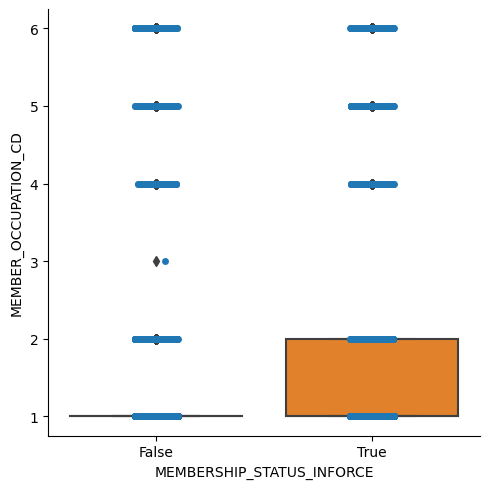

In [378]:
# Plotting the scatter plot and box plot for a few features that we got as important features from the algorithms. 

sb.catplot(x="MEMBERSHIP_STATUS_INFORCE", y="MEMBER_OCCUPATION_CD", data=onehot_req_data)
sb.boxplot(x="MEMBERSHIP_STATUS_INFORCE", y="MEMBER_OCCUPATION_CD", data=onehot_req_data)


<Axes: xlabel='MEMBERSHIP_STATUS_INFORCE', ylabel='MEMBER_AGE_AT_ISSUE'>

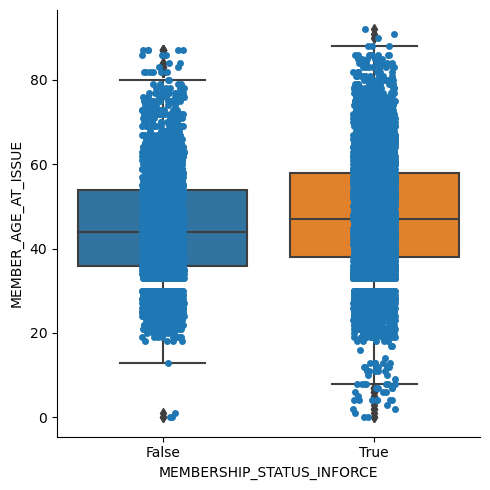

In [379]:
sb.catplot(x="MEMBERSHIP_STATUS_INFORCE", y="MEMBER_AGE_AT_ISSUE", data=onehot_req_data)
sb.boxplot(x="MEMBERSHIP_STATUS_INFORCE", y="MEMBER_AGE_AT_ISSUE", data=onehot_req_data)


<Axes: xlabel='MEMBERSHIP_STATUS_INFORCE', ylabel='MEMBERSHIP_TERM_YEARS'>

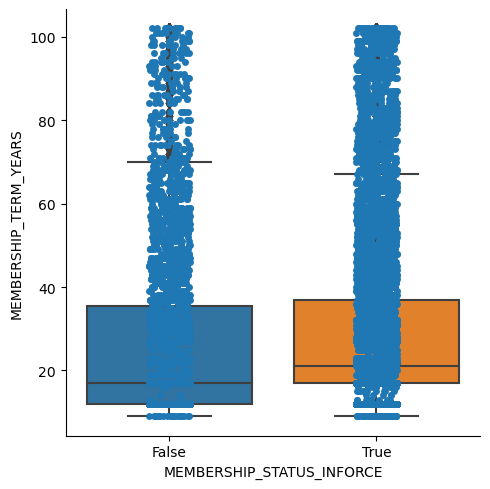

In [380]:
sb.catplot(x="MEMBERSHIP_STATUS_INFORCE", y="MEMBERSHIP_TERM_YEARS", data=onehot_req_data)
sb.boxplot(x="MEMBERSHIP_STATUS_INFORCE", y="MEMBERSHIP_TERM_YEARS", data=onehot_req_data)


<Axes: xlabel='MEMBERSHIP_STATUS_INFORCE', ylabel='MEMBER_ANNUAL_INCOME'>

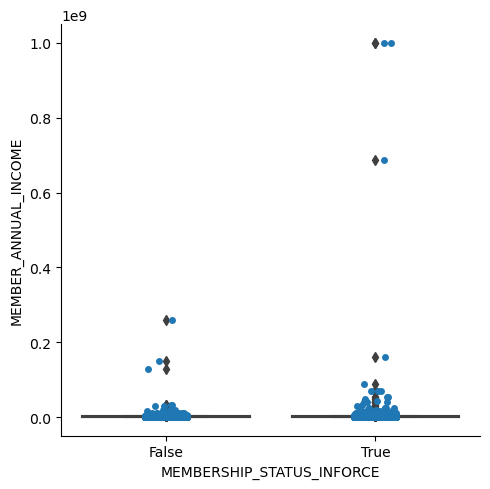

In [381]:
sb.catplot(x="MEMBERSHIP_STATUS_INFORCE", y="MEMBER_ANNUAL_INCOME", data=onehot_req_data)
sb.boxplot(x="MEMBERSHIP_STATUS_INFORCE", y="MEMBER_ANNUAL_INCOME", data=onehot_req_data)


<Axes: xlabel='MEMBERSHIP_STATUS_INFORCE', ylabel='ANNUAL_FEES'>

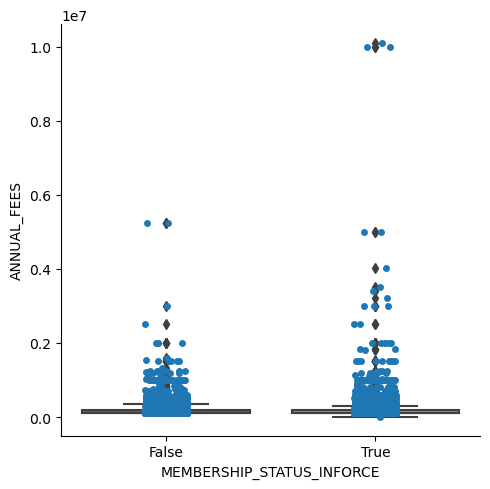

In [382]:
sb.catplot(x="MEMBERSHIP_STATUS_INFORCE", y="ANNUAL_FEES", data=onehot_req_data)
sb.boxplot(x="MEMBERSHIP_STATUS_INFORCE", y="ANNUAL_FEES", data=onehot_req_data)


# Split the Data into Training and Test Sets:

In [383]:
#Separating data into two parts, X is independent variables (features) and y is our target variable
data_copy = onehot_req_data.copy()
X = onehot_req_data.drop(['MEMBERSHIP_STATUS_INFORCE'], axis=1)
y = onehot_req_data.drop(['MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_ANNUAL_INCOME',
                        'MEMBER_OCCUPATION_CD', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS',
                        'START_DATE (YYYYMMDD)', 'MEMBER_MARITAL_STATUS_M',
                        'MEMBER_MARITAL_STATUS_Other', 'MEMBER_MARITAL_STATUS_S',
                        'MEMBER_MARITAL_STATUS_W', 'MEMBER_GENDER_M', 'MEMBER_GENDER_Other',
                        'MEMBERSHIP_PACKAGE_TYPE-B', 'PAYMENT_MODE_MONTHLY',
                        'PAYMENT_MODE_QUARTERLY', 'PAYMENT_MODE_SEMI-ANNUAL',
                        'PAYMENT_MODE_SINGLE-PREMIUM'],axis=1)

# Feature Selection using selectKBest classifier

In [384]:
#apply SelectKBest class to extract top 10 best features using chi2 as score_func
bestfeatures = SelectKBest(score_func=chi2, k=5) 
fit = bestfeatures.fit(X,y.to_numpy())
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
# Printing the feature names and the scores for the top 10 
print(featureScores.nlargest(5,'Score')) 

                     Features         Score
2        MEMBER_ANNUAL_INCOME  3.063639e+08
1                 ANNUAL_FEES  3.479244e+06
4         MEMBER_AGE_AT_ISSUE  3.544417e+02
0       MEMBERSHIP_TERM_YEARS  3.127244e+02
13  MEMBERSHIP_PACKAGE_TYPE-B  1.646254e+02


# Correlation Matrix

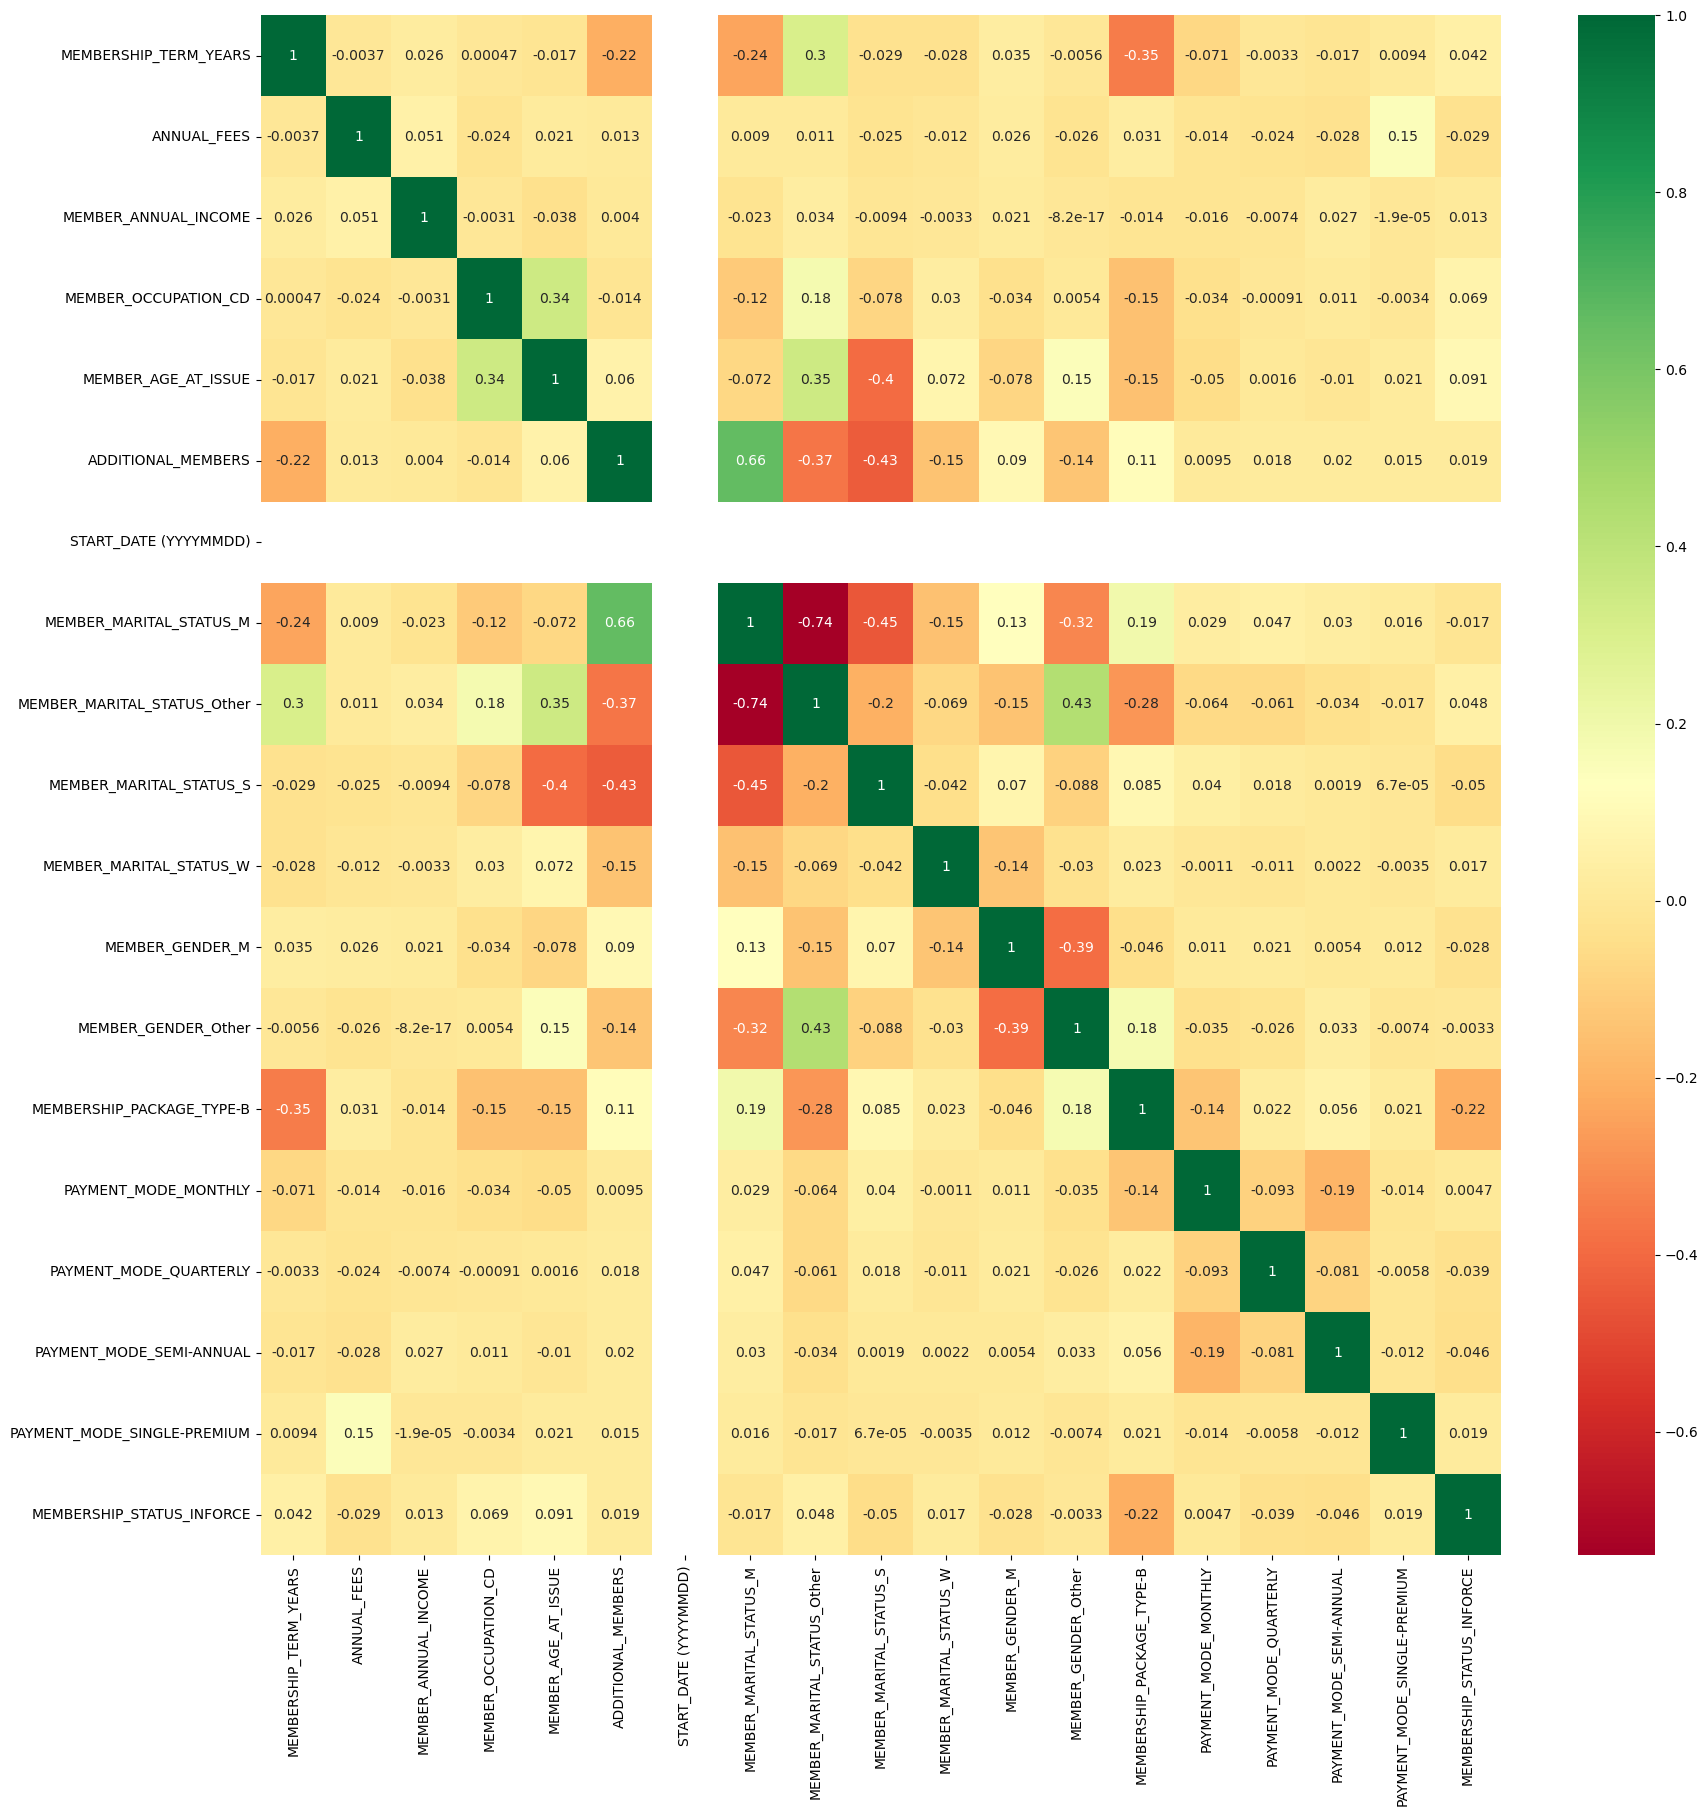

In [385]:
#get correlations of each features in dataset
corrmat = onehot_req_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sb.heatmap(onehot_req_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Fit the Model using Logistic Regression and finding confusion matrix,accuracy,parameters:

In [386]:
model = LogisticRegression(C=10**2)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.10, random_state=0, stratify=y)
ytest = ytest.to_numpy() 
model.fit(xtrain, ytrain)
predicted_classes = model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(), predicted_classes)
parameters = model.coef_
print("Accuracy: ", accuracy)
print("\n")
print("Parameters: ", parameters) # printing the coefficients
print("\n")
c_m= confusion_matrix(ytest, predicted_classes) 
print (cm) 

Accuracy:  0.6962391513982642


Parameters:  [[ 8.28514188e-03 -2.40987437e-07  2.54292801e-08  5.43560133e-04
   1.28840467e-02  3.84288075e-04  2.45677963e-04  1.50515284e-04
   7.63978574e-05  1.09908460e-05  5.64384652e-06  1.49594867e-04
   8.89852436e-06  1.60447120e-05  5.04533941e-05  2.98482791e-07
   1.78268218e-05  3.41000126e-07]]


[[  1 314]
 [  1 721]]


# Plotting Confusion Matrix

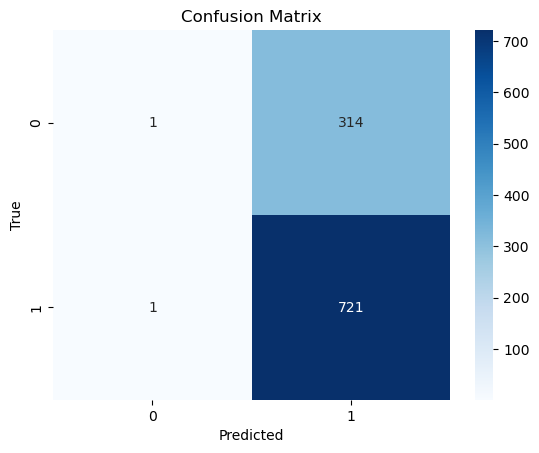

In [387]:
sb.heatmap(confusion_matrix(ytest, predicted_classes), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Important Features using Random forest

In [388]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(xtrain, ytrain)

SelectFromModel(estimator=RandomForestClassifier())

In [389]:
# True for the features whose importance is greater than the mean importance and False for the rest.
sel.get_support()

array([ True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [390]:
selected_feat=xtrain.columns[(sel.get_support())]
selected_feat

Index(['MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_ANNUAL_INCOME',
       'MEMBER_AGE_AT_ISSUE'],
      dtype='object')

# churn probability of each user so they can be taken care accordingly.

In [391]:

data_copy['Churn_probability'] = xg_model.predict_proba(data_copy[xtrain.columns])[:,1]
data_copy.Churn_probability[:5]

0    0.753552
1    0.882713
2    0.647033
3    0.790093
4    0.707753
Name: Churn_probability, dtype: float32

In [396]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Creating parameter grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
    ]
# Create grid search object
gso = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
# Fit on data

best_lrm = gso.fit(xtrain, ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [393]:
y_pred_rf = best_lrm.predict(xtest)

In [394]:
print(best_lrm.best_params_)
print(classification_report(ytest, y_pred_rf))
print(accuracy_score(ytest.flatten(), y_pred_rf))

{'classifier': RandomForestClassifier(max_features=6), 'classifier__max_features': 6, 'classifier__n_estimators': 100}
              precision    recall  f1-score   support

       False       0.52      0.32      0.40       315
        True       0.75      0.87      0.80       722

    accuracy                           0.70      1037
   macro avg       0.63      0.60      0.60      1037
weighted avg       0.68      0.70      0.68      1037

0.7029893924783028


In [395]:
gso1 = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(gso1, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(xtrain, ytrain)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(xtest)

# New Model Evaluation metrics 
print(classification_report(ytest, y_pred_acc))

#Logistic Regression (Grid Search) Confusion matrix
print(confusion_matrix(ytest,y_pred_acc))
print(accuracy_score(ytest.flatten(), y_pred_acc))

              precision    recall  f1-score   support

       False       0.50      0.00      0.01       315
        True       0.70      1.00      0.82       722

    accuracy                           0.70      1037
   macro avg       0.60      0.50      0.41      1037
weighted avg       0.64      0.70      0.57      1037

[[  1 314]
 [  1 721]]
0.6962391513982642
